In [1]:
!python -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install numpy==1.19.2

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 94.4 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
!pip install sklearn
!pip install Minio
!pip install scipy
!pip install seaborn
!pip3 install -U scikit-learn scipy matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=cc6694f9a9d576f3187b068d770cdc385a52f2ea39265fbf30e5e6ffd715687a
  Stored in directory: /home/omi/.cache/pip/wheels/1c/2f/26/476423e3abcbdc095c9061b4a385339f4d5c4952c036ef8262
Successfully built sklearn
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 6.0 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 68.3 MB/s eta 0:00:0000:0100:01
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 110.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━

In [4]:
from minio import Minio
import scipy.io
import numpy as np
import os
import keras
import tensorflow as tf
from pathlib import Path
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
#Access the data stored in the hard drive
dataFolder = "E:/Luzius_ML_allWESAdata_hybrid/"

In [5]:
# Declaration of an empty list for data train/valid/test
EEG_training_data = np.array([])
EEG_validation_data = np.array([])
EEG_testing_data = np.array([])

# Declaration of an empty list for labels train/valid/test
EEG_training_label = []
EEG_validation_label = []
EEG_testing_label = []

# Declaration of the variable for type of data: train/validate/test
state = None

# Declaration of the other variables
subject_list= []
new_subject_list= []

train_subject_list = []
valid_subject_list = []
test_subject_list = []

#Variable declaration for different counters
count_labels_with4 = 0
total_files_with_incorrect_label4 = 0
count_new_label_detected = 0

In [6]:
# client = Minio(
#          "134.60.30.14:30900",
#          access_key="bmt",
#          secret_key="wwU4HwPccTkSvPlXxoyHnI4W",
#          secure=False,
#      )
# print(f"bmt bucket exists: {client.bucket_exists('bmt')}")

bmt bucket exists: True


In [7]:
# # List all object paths in bucket.
# objects = client.list_objects('bmt', prefix="data/WESA/S0")#, recursive=True,)
# for obj in objects:
#     #print(obj.object_name)
#     subjects = obj.object_name
#     subject_list.append(subjects)
#     continue
#
#
#
# count = obj.object_name
# #print(subject_list)
# subject_list_len = len(subject_list)
# print("total number of subject folders are", subject_list_len)

total number of subject folders are 24


In [ ]:
#Function to rotate the array and access the element one by one in rotation
def rotated_List_array(list_of_arr, rotation_by, length_of_arrayy):
    list_of_arr[:] = list_of_arr[rotation_by:length_of_arrayy]+list_of_arr[0:rotation_by]
    return list_of_arr

#search total number of folders inside the sleep data
subject_list = [f for f in os.listdir(dataFolder) if f.startswith('S0')]
subject_list_len = len(subject_list)


In [8]:
# # here will be code to rotate/Shift subjects
#total_subjects = subject_list_len
# training_subjects_num = int(subject_list_len * 0.75)
# validation_subjects_num = int(subject_list_len * 0.125)
# testing_subjects_num = int(subject_list_len * 0.125)

# here will be code to rotate/Shift subjects
total_subjects = 24
training_subjects_num = 18
validation_subjects_num = 3
testing_subjects_num = 3

counter_val = 0
counter_train = 0

In [9]:
#Function to rotate the array and access the element one by one in rotation
def rotated_List_array(list_of_arr, rotation_by, length_of_array):
    #print(list_of_arr[rotation_by:length_of_array])
    list_of_arr[:] = list_of_arr[rotation_by:length_of_array]+list_of_arr[0:rotation_by]

    return list_of_arr

for k in range(total_subjects):
    temp_d = rotated_List_array(subject_list, 1, total_subjects)
    
    #np array of the list of subject
    subject_list_nparray = np.array(temp_d)


In [10]:
    #assign subject list to train/validate/test
    traindata_subjects = subject_list_nparray[:training_subjects_num]
    print(traindata_subjects)
    
    # Find score file of each subject
    for i in traindata_subjects:     
        objects = client.list_objects('bmt', recursive=True, prefix=i,)
        for obj in objects:
            train_name = obj.object_name
            subject = train_name[10:14]
            scoredString = '_score'  # string to check in the name of mat file
            if scoredString not in train_name:
                continue
            else: 
                # maintain a new list for train data to store all score file
                train_subject_list.append(train_name)
                #print(train_subject_list)
     
    # appending those stored trained file into subject list that we can use further for data seperation
    new_subject_list= train_subject_list

['data/WESA/S004/' 'data/WESA/S005/' 'data/WESA/S006/' 'data/WESA/S008/'
 'data/WESA/S011/' 'data/WESA/S015/' 'data/WESA/S016/' 'data/WESA/S021/'
 'data/WESA/S025/' 'data/WESA/S027/' 'data/WESA/S029/' 'data/WESA/S030/'
 'data/WESA/S032/' 'data/WESA/S033/' 'data/WESA/S036/' 'data/WESA/S037/'
 'data/WESA/S039/' 'data/WESA/S040/']


In [11]:
    validatedata_subjects = subject_list_nparray[(training_subjects_num) :(training_subjects_num + (validation_subjects_num))]
    print(validatedata_subjects)
    
    # Find score file of each subject
    for i in validatedata_subjects:     
        objects = client.list_objects('bmt', recursive=True, prefix=i,)
        for obj in objects:
            valid_name = obj.object_name
            subject = valid_name[10:14]
            scoredString = '_score'  # string to check in the name of mat file
            if scoredString not in valid_name:
                continue
            else:
                # maintain a new list for valid data to store all score file
                valid_subject_list.append(valid_name)
                #print(valid_subject_list)

    # appending those stored valid file into subject list that we can use further for data seperation
    new_subject_list = new_subject_list + valid_subject_list

['data/WESA/S041/' 'data/WESA/S042/' 'data/WESA/S043/']


In [12]:
    testdata_subjects = subject_list_nparray[(training_subjects_num + (validation_subjects_num)) :((training_subjects_num + (validation_subjects_num)) + (testing_subjects_num))]
    print(testdata_subjects)

    # Find score file of each subject
    for i in testdata_subjects:     
        objects = client.list_objects('bmt', recursive=True, prefix=i,)
        for obj in objects:
            test_name = obj.object_name
            subject = test_name[10:14]
            scoredString = '_score'  # string to check in the name of mat file
            if scoredString not in test_name:
                continue
            else:
                # maintain a new list for test data to store all score file
                test_subject_list.append(test_name)
                #print(test_subject_list)

    # appending those stored trained file into subject list that we can use further for data seperation
    new_subject_list = new_subject_list + test_subject_list

['data/WESA/S053/' 'data/WESA/S058/' 'data/WESA/S059/']


In [13]:
    #access the sleep data of subject one by one
    for S0_file in new_subject_list:
        #print(S0_file)
        #Corrupted file for now, #ignoring this file for now, seems like this file is corrupted
        #if S0_file =='data/WESA/S005/InterventionPeriod1/EEG/Night14/WESA_EEG_S005_20180617_ML_newfilt_score.mat':
        #if S0_file =='data/WESA/S004/InterventionPeriod1/EEG/Night05/WESA_EEG_S004_20180608_ML_newfilt_score.mat': #S0_file == 'data/WESA/S004/InterventionPeriod2/EEG/Night01/WESA_EEG_S004_20180702_ML_newfilt_score.mat': #or : 
            #continue 
            
        #directly jump to the data & label division on the basis of state
        if S0_file in test_subject_list: #testdata_subjects:
            state = 1

        elif S0_file in valid_subject_list: #validatedata_subjects:
            state = 2

        else:
            state = 0    
        
        #load data from the .mat file
        client.fget_object("bmt", S0_file, "matfile.mat")
        data = scipy.io.loadmat("matfile.mat", squeeze_me=True)
        
        #fetch EEG data from all the data keys
        EEG = data['FpzA2_filt']
        
        
        # segregating labels from the data file
        try: 
            labels = next(v for k, v in data.items() if k.startswith('sleepStage_score_'))
            np.set_printoptions(threshold=np.inf)
            #print(labels)
        except StopIteration:
            print("Directory not found")
            exit(2)
            
            
        # calculating the size of the labels
        label_size = labels.size
        #print(label_size)
        
        #When LABEL4 appear in the label file:error regarding label4        
        for j in range(label_size):
            if labels[j] == 4:
                labels[j]= labels[j-1]
                # print("label4 found in the file name:", S0_file)
                # print("new corrected labels are:", labels)
                
                
#         #find out the file which contains label4                
#                 #print("found the file which contains label4")
#                 count_labels_with4 = count_labels_with4 +1   
#                 print("total number of  labels with4 is:", count_labels_with4, "in the file name:", S0_file) 
        
#         if (count_labels_with4>0):
#             total_files_with_incorrect_label4 = total_files_with_incorrect_label4+1
#             print(total_files_with_incorrect_label4)
#             #print("TO check the label files with 4:", labels)
#             count_labels_with4 = 0 
                        
        
        #trying to replace label5 with label4   
        labels[labels==5]=4   
        #print("labels after changing 5 to 4", labels)
        
        #removing the last label from the whole data(the last label is '6' which we do not want to use)
        labels = labels[:-1]       
        label_size = labels.size
        #print("Check label size now", labels.size)
        
        # #check if there is any other labels
        # for j in range(label_size):
        #     if (labels[j] > 4): 
        #         count_new_label_detected = count_new_label_detected + 1
        #         print("label is :", labels[j], "appears",  count_new_label_detected, "times in the file name:", S0_file) 
        #         #print("print labels to find new detected label6:", labels)

        #When LABEL6 appear in the label file:error regarding label6
        # #count_new_label_detected = 0
        # labels[labels==6]=2 
        
        #When LABEL6 appear in the label file:error regarding label6        
        for j in range(label_size):
            if labels[j] == 6:
                labels[j]= labels[j-1]
                # print("label6 found in the file name:", S0_file)
                # print("new corrected labels are:", labels)
        
        #Reduce labels W=0, NREM = 1, REM =2 to make a MATRIX:3x3
        #Change label N2(2)->1 
        labels[labels==2]=1
        #Change label N3(3)->1 
        labels[labels==3]=1
        #Change label REM->2 
        labels[labels==4]=2
        #print("Check label after changing it into 3 states:", labels)
        
        
        #From here we will start the slicing of the data:, making zero array with dimension labels*5000
        sliced_data = np.zeros((label_size, 5000))
        labels = np.expand_dims(labels, axis=1)
          
    
        #This loop will run, same as the number of labels and fill the slice data with the original data-5000
        for j in range(label_size):
            index = j * 5000
            sliced_data[j, :] = EEG[index:index + 5000]#

            
        # Divide the data & labels on the basis of subject
        if state == 1:           
            if EEG_testing_data.size == 0:
                EEG_testing_data = sliced_data
                EEG_testing_label = labels
            else: 
                EEG_testing_data = np.vstack((EEG_testing_data, sliced_data))
                EEG_testing_label = np.append(EEG_testing_label, labels)

        elif state == 2:            
            if EEG_validation_data.size == 0:
                EEG_validation_data = sliced_data
                EEG_validation_label = labels
            else:
                EEG_validation_data = np.vstack((EEG_validation_data, sliced_data))
                EEG_validation_label = np.append(EEG_validation_label, labels)
        else:           
            if EEG_training_data.size == 0:
                EEG_training_data = sliced_data
                EEG_training_label = labels
            else:
                EEG_training_data = np.vstack((EEG_training_data, sliced_data))
                EEG_training_label = np.append(EEG_training_label, labels)


In [14]:
print("total number of files with label 4 already present:", total_files_with_incorrect_label4)

total number of files with label 4 already present: 0


In [380]:
print(EEG_training_data.shape)
print(EEG_validation_data.shape)
print(EEG_testing_data.shape)

(119973, 5000, 1)
(9326, 5000, 1)
(9365, 5000, 1)


In [381]:
print(EEG_training_label.shape)
print(EEG_validation_label.shape)
print(EEG_testing_label.shape)

(119973,)
(9326,)
(9365,)


In [382]:
EEG_training_data = EEG_training_data.reshape(EEG_training_data.shape[0], EEG_training_data.shape[1],1)
print(EEG_training_data.shape)
EEG_validation_data = EEG_validation_data.reshape(EEG_validation_data.shape[0], EEG_validation_data.shape[1],1)
print(EEG_validation_data.shape)
EEG_testing_data = EEG_testing_data.reshape(EEG_testing_data.shape[0], EEG_testing_data.shape[1],1)
print(EEG_testing_data.shape)

(119973, 5000, 1)
(9326, 5000, 1)
(9365, 5000, 1)


In [383]:
label_class = (np.unique(EEG_training_label))
num_classes = label_class.size

In [384]:
from sklearn.utils import class_weight 
# import tracemalloc
# tracemalloc.start()


class_weights = class_weight.compute_class_weight(
                                                   class_weight ='balanced',
                                                   classes =np.unique(EEG_training_label), 
                                                   y= EEG_training_label)

# when using no weightage szstem then N2 has heighest performance.
#train_class_weights = dict(enumerate(class_weights))# using this N3 has heighest performance
#train_class_weights =  dict(zip(np.unique(EEG_training_label), class_weights))# using this W has heighest performance


# class_weight_dict= {0: class_weights[0],
#                 1: class_weights[1],
#                 2: class_weights[2]}
# print(class_weight_dict)
#{0: 2.409386673093144, 1: 0.49675175454940684, 2: 1.7486226497595103}

class_weight_dict= {0: 0.9,
                1: 1.5,
                2: 1.5}
print(class_weight_dict)

{0: 0.9, 1: 1.5, 2: 1.5}


In [385]:
# #define the model using CNN
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=64, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1))) 
# model.add(tf.keras.layers.Dropout(0.4))
# model.add(tf.keras.layers.MaxPool1D(8, padding='same'))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(16, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.4))
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [386]:
# #define the model using CNN
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=64, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1))) 
# model.add(tf.keras.layers.MaxPool1D(8, padding='same'))
# model.add(tf.keras.layers.Conv1D(filters=64, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1))) 
# model.add(tf.keras.layers.MaxPool1D(8, padding='same'))
# model.add(tf.keras.layers.Dense(16, activation='relu'))
# model.add(tf.keras.layers.MaxPool1D(8, padding='same'))
# model.add(tf.keras.layers.Dropout(0.4))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [387]:
# #define the model using CNN with more maxpool
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=64, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1)))  # input_shape=(5000, 1)
# model.add(tf.keras.layers.Dropout(0.4))
# model.add(tf.keras.layers.MaxPool1D(8, padding='same'))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(16, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.4))
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [388]:
# #define the model using CNN with lesser layer 
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=64, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1)))  # input_shape=(5000, 1)
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [389]:
# #define the model using CNN with lesser layers with maxpool
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=64, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1)))  # input_shape=(5000, 1)
# model.add(tf.keras.layers.MaxPool1D(8, padding='same'))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [390]:
# #define the model using GRU without early stopping
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.GRU(50, batch_input_shape=(None,5000, 1))) 
# #model.add(tf.keras.layers.GRU(50, batch_input_shape=(None,5000, 1))) 
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [391]:
# #define the model using CNN+ RNN
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=8, kernel_size= 4, activation='relu', batch_input_shape=(None,5000, 1)))  # input_shape=(5000, 1)
# #model.add(tf.keras.layers.MaxPool1D(4, padding='same'))
# model.add(tf.keras.layers.GRU(30, return_sequences=False, dropout=0.2))
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [392]:
# #define the model using CNN simplified
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=64, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1)))  # input_shape=(5000, 1)
# model.add(tf.keras.layers.MaxPool1D(3, padding='same'))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.MaxPool1D(3, padding='same'))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(16, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [393]:
# #define the model using CNN1: mentioned in Fall detection using sound 
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=32, kernel_size= 3, activation='relu', batch_input_shape=(None,5000, 1)))  
# model.add(tf.keras.layers.Conv1D(filters=64, kernel_size= 3, activation='relu', batch_input_shape=(None,5000, 1)))  
# model.add(tf.keras.layers.MaxPool1D(8, padding='same'))
# model.add(tf.keras.layers.Dropout(0.55))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [394]:
# #define the model using CNN2: mentioned as per in anger detection
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=139, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.MaxPool1D(16, padding='same'))
# model.add(tf.keras.layers.Conv1D(filters=70, kernel_size= 32, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.MaxPool1D(32, padding='same'))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [395]:
# #define the model using CNN3: mentioned as per in doc shareb by LUz 1
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=32, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.MaxPool1D(8, padding='same'))
# model.add(tf.keras.layers.Conv1D(filters=16, kernel_size= 8, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.MaxPool1D(8, padding='same'))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [396]:
# #define the model using CNN4
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=64, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1))) 
# model.add(tf.keras.layers.Dropout(0.4))
# model.add(tf.keras.layers.Dense(16, activation='relu'))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [397]:
# #define the model using CNN5
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.MaxPool1D(8, padding='same'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.MaxPool1D(32, padding='same'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [398]:
# #define the model using CNN6: Frugal Edge devices
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=32, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.Dense(8, activation='relu'))
# model.add(tf.keras.layers.Dense(8, activation='relu'))
# model.add(tf.keras.layers.Dense(8, activation='relu'))
# model.add(tf.keras.layers.Dense(8, activation='relu'))
# model.add(tf.keras.layers.Dense(8, activation='relu'))
# model.add(tf.keras.layers.Dense(8, activation='relu'))
# model.add(tf.keras.layers.Dense(8, activation='relu'))
# model.add(tf.keras.layers.Dense(8, activation='relu'))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [399]:
# #define the model using CNN7: R-CNN
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.MaxPool1D(8, padding='same'))
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.MaxPool1D(8, padding='same'))
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.MaxPool1D(16, padding='same'))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(16, activation='relu'))
# model.add(tf.keras.layers.Dense(16, activation='relu'))
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [400]:
# #define the model using CNN7: R-CNN
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=32, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1)))

In [401]:
# #Combining CNN3 +CNN4
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=32, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.MaxPool1D(4, padding='same'))
# model.add(tf.keras.layers.Conv1D(filters=16, kernel_size= 8, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.MaxPool1D(4, padding='same'))
# model.add(tf.keras.layers.Conv1D(filters=8, kernel_size= 4, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.MaxPool1D(4, padding='same'))
# #model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Dense(16, activation='relu'))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [402]:
# #Combining CNN8: CNN + RNN LSTM
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=32, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.MaxPool1D(4, padding='same'))
# model.add(tf.keras.layers.LSTM(units=30, return_sequences=True))
# model.add(tf.keras.layers.LSTM(units=30, return_sequences=True))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [403]:
# #LSTM model ????????????????????????
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=32, kernel_size= 16, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.LSTM(units=3, return_sequences=True))
# model.add(tf.keras.layers.LSTM(units=3, return_sequences=True))
# model.add(tf.keras.layers.Dropout(0.2))
# # model.add(tf.keras.layers.LSTM(units=70, return_sequences=True))
# # model.add(tf.keras.layers.Dropout(0.2))
# #model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# # batch_input_shape = (None,5000, 1)
# model.build(input_shape=batch_input_shape)

In [404]:
# #Combining CNN9: activity tracking of Elderly people
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 8, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 8, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [405]:
# #Combining CNN10:Beehive Project
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 32, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 32, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


# #InputLayer(input_shape=input_shape))

In [406]:
# #Combining CNN3 +CNN4+CNN10
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 3, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.MaxPool1D(4, padding='same'))
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 3, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.MaxPool1D(4, padding='same'))
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 3, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.MaxPool1D(4, padding='same'))
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [407]:
# #Combining CNN3 +CNN4 +CNN10:CNN13
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 32, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 32, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 32, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 32, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [408]:
#Combining CNN11: SNoring Classification example
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size= 64, activation='relu', batch_input_shape=(None,5000, 1)))
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size= 64, activation='relu', batch_input_shape=(None,5000, 1)))
model.add(tf.keras.layers.MaxPool1D(8, padding='same'))
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size= 64, activation='relu', batch_input_shape=(None,5000, 1)))
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size= 64, activation='relu', batch_input_shape=(None,5000, 1)))
model.add(tf.keras.layers.MaxPool1D(8, padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [409]:
# from keras.layers import Concatenate, Dense, Input
# from keras import Model

# model = tf.keras.Sequential()

# input1 = Input(118612,5000, 1)
# model_1D.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 64, activation='relu', batch_input_shape=(None,5000, 1)))
# model_1D.add(tf.keras.layers.MaxPool1D(8, padding='same'))
# model_1D.add(tf.keras.layers.Dropout(0.50))
# model_1D.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 8, activation='relu', batch_input_shape=(None,5000, 1)))
# model_1D.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 8, activation='relu', batch_input_shape=(None,5000, 1)))
# model_1D.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 8, activation='relu', batch_input_shape=(None,5000, 1)))
# model_1D.add(tf.keras.layers.MaxPool1D(4, padding='same'))
# model_1D.add(tf.keras.layers.Flatten())
# model_1D.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# input2 = Input(118612,5000, 1)
# model_1D2.add(tf.keras.layers.Conv1D(filters=1000, kernel_size= 64, activation='relu', batch_input_shape=(None,5000, 1)))
# model_1D2.add(tf.keras.layers.MaxPool1D(4, padding='same'))
# model_1D2.add(tf.keras.layers.Dropout(0.50))
# model_1D2.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 6, activation='relu', batch_input_shape=(None,5000, 1)))
# model_1D2.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 6, activation='relu', batch_input_shape=(None,5000, 1)))
# model_1D2.add(tf.keras.layers.Conv1D(filters=128, kernel_size= 6, activation='relu', batch_input_shape=(None,5000, 1)))
# model_1D2.add(tf.keras.layers.MaxPool1D(2, padding='same'))
# model_1D2.add(tf.keras.layers.Flatten())
# model_1D2.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# merged = Concatenate([model_1D, model_1D2])
# output = Dense(num_classes, activation='softmax')(merged)
# model = Model(outputs=output)

In [410]:
# #Combining CNN11: Modified example
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(filters=64, kernel_size= 32, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.Conv1D(filters=64, kernel_size= 32, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.Conv1D(filters=32, kernel_size= 32, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.MaxPool1D(16, padding='same'))
# model.add(tf.keras.layers.Conv1D(filters=64, kernel_size= 32, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.Conv1D(filters=64, kernel_size= 32, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.Conv1D(filters=32, kernel_size= 32, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Conv1D(filters=64, kernel_size= 32, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.Conv1D(filters=64, kernel_size= 32, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.Conv1D(filters=32, kernel_size= 32, activation='relu', batch_input_shape=(None,5000, 1)))
# model.add(tf.keras.layers.MaxPool1D(16, padding='same'))
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.ReLU(0.6))
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.ReLU(0.6))
# model.add(tf.keras.layers.Dense(32, activation='relu'))
# model.add(tf.keras.layers.ReLU(0.6))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dense(32, activation='relu'))
# model.add(tf.keras.layers.Dense(32, activation='relu'))
# model.add(tf.keras.layers.Dense(32, activation='relu'))
# model.add(tf.keras.layers.Dense(32, activation='relu'))
# model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [411]:
#Summary of the model defined:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 4937, 64)          4160      
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 4874, 64)          262208    
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 610, 64)           0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 547, 64)           262208    
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 484, 64)           262208    
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 61, 64)            0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 3904)             

In [412]:
#Define loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
                      loss=  'categorical_crossentropy', # 'sparse_categorical_crossentropy',
                      optimizer= optimizer, #'SGD', 'adam', #
                      metrics=[tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives(), 'accuracy'])

In [413]:
#one Hot Encoding
y_train_hot = tf.keras.utils.to_categorical(EEG_training_label, num_classes)
#print('New y_train shape: ', y_train_hot.shape)

y_valid_hot = tf.keras.utils.to_categorical(EEG_validation_label, num_classes)
#print('New y_valid shape: ', y_valid_hot.shape)


In [414]:
# patient early stopping
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights = True)

In [415]:
# apply fit on data
import keras.callbacks

history = model.fit(
                            x=EEG_training_data,
                            y=y_train_hot,
                            batch_size=100,
                            epochs=100, 
                            validation_data=(EEG_validation_data, y_valid_hot),
                            class_weight = class_weight_dict,
                            callbacks = [es]
                             )

Epoch 1/100
1200/1200 [==============================] - 67s 55ms/step - loss: 1.2083 - false_negatives_9: 60028.0000 - false_positives_9: 29456.0000 - accuracy: 0.6706 - val_loss: 0.8218 - val_false_negatives_9: 2950.0000 - val_false_positives_9: 2950.0000 - val_accuracy: 0.6837
Epoch 2/100
1200/1200 [==============================] - 66s 55ms/step - loss: 1.1133 - false_negatives_9: 39468.0000 - false_positives_9: 39468.0000 - accuracy: 0.6710 - val_loss: 0.8207 - val_false_negatives_9: 2950.0000 - val_false_positives_9: 2950.0000 - val_accuracy: 0.6837
Epoch 3/100
1200/1200 [==============================] - 66s 55ms/step - loss: 1.1056 - false_negatives_9: 39468.0000 - false_positives_9: 39468.0000 - accuracy: 0.6710 - val_loss: 0.8217 - val_false_negatives_9: 2950.0000 - val_false_positives_9: 2950.0000 - val_accuracy: 0.6837
Epoch 4/100
1200/1200 [==============================] - 66s 55ms/step - loss: 1.1048 - false_negatives_9: 39468.0000 - false_positives_9: 39468.0000 - accur

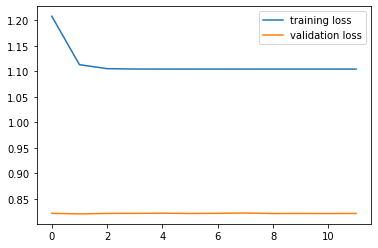

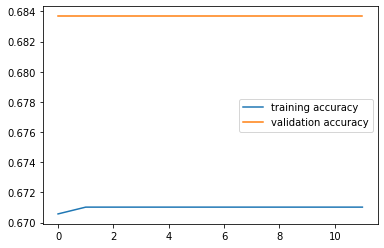

In [416]:
# plot training history
from matplotlib import pyplot
#Plot the graph for training loss vs validation loss
pyplot.plot(history.history['loss'], label='training loss')
pyplot.plot(history.history['val_loss'], label='validation loss')
pyplot.legend()
pyplot.show()

#Plot the graph for training accuracy vs validation accuracy
pyplot.plot(history.history['accuracy'], label='training accuracy')
pyplot.plot(history.history['val_accuracy'], label='validation accuracy')
pyplot.legend()
pyplot.show()

In [417]:
print(EEG_testing_label.shape)
y_test_hot = tf.keras.utils.to_categorical(EEG_testing_label, num_classes)
print('New y_test shape: ', y_test_hot.shape)

(9365,)
New y_test shape:  (9365, 3)


In [418]:
# testing accuracy on validation data
model_prediction = model.predict(EEG_testing_data)
predicted_matrix = tf.math.confusion_matrix(labels=y_test_hot.argmax(axis=1), predictions=model_prediction.argmax(axis=1)).numpy()
print(predicted_matrix)
print(predicted_matrix.shape)

[[   0 1788    0]
 [   0 5746    0]
 [   0 1831    0]]
(3, 3)


[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[   0 1788    0    0 5746    0    0 1831    0]


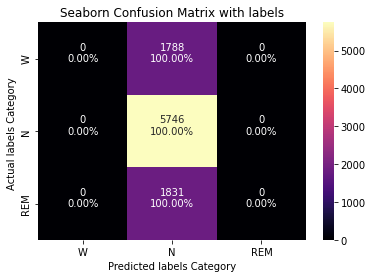

In [419]:
import seaborn as sns

%matplotlib inline
# ax = sns.heatmap(predicted_matrix, annot=True, fmt='d')
# #f

predicted_matrix_percentage = (predicted_matrix.astype('float') / predicted_matrix.sum(axis=1)[:, np.newaxis]) 
print(predicted_matrix_percentage)

group_counts = ["{0:0.0f}".format(value) for value in
                predicted_matrix.flatten()]
print(predicted_matrix.flatten())

group_percentages = ["{0:.2%}".format(value) for value in
                     predicted_matrix_percentage.flatten()]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)


ax = sns.heatmap(predicted_matrix, annot=labels, fmt='', cmap='magma')



ax.set_title('Seaborn Confusion Matrix with labels');
ax.set_xlabel('Predicted labels Category')
ax.set_ylabel('Actual labels Category ');
# 
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['W','N', 'REM'])
ax.yaxis.set_ticklabels(['W','N', 'REM'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [420]:
from sklearn.metrics import classification_report

y_true = y_test_hot
y_pred= model_prediction 

y_true=np.argmax(y_true, axis=1)
y_pred=np.argmax(y_pred, axis=1)


print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1788
           1       0.61      1.00      0.76      5746
           2       0.00      0.00      0.00      1831

    accuracy                           0.61      9365
   macro avg       0.20      0.33      0.25      9365
weighted avg       0.38      0.61      0.47      9365



/home/omi/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/omi/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/omi/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [421]:
# #TensorFlow Lite Conversion
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# model_tflite = converter.convert()

# print(Path('Sleepmodel.tflite').write_bytes(model_tflite))

In [422]:
# !sudo apt-get update && sudo apt-get -qq install xxd
# !xxd -i Sleepmodel.tflite > Sleepmodel_micro.cc
